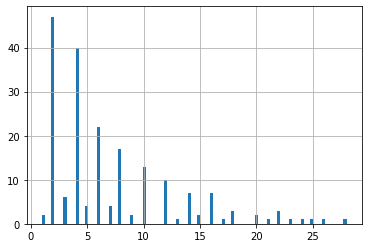

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np


pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv') 
stud_math.address = stud_math.address.fillna('U') # заменяем пропуски на самые часто встречающиеся значения
stud_math.famsize = stud_math.famsize.fillna('GT3')
stud_math.Pstatus = stud_math.Pstatus.fillna('T')
stud_math.Mjob=stud_math.Mjob.fillna('other')
stud_math.Fjob=stud_math.Fjob.fillna('other')
stud_math.reason=stud_math.reason.fillna('other')
stud_math.guardian=stud_math.guardian.fillna('mother')
stud_math.traveltime=stud_math.traveltime.fillna(1.0)
stud_math.failures=stud_math.failures.fillna(0.0)
stud_math.schoolsup=stud_math.schoolsup.fillna('no')
stud_math.famsup=stud_math.famsup.fillna('yes')
stud_math.paid=stud_math.paid.fillna('no')
stud_math.nursery=stud_math.nursery.fillna('yes')
stud_math.higher=stud_math.higher.fillna('yes')
stud_math.internet=stud_math.internet.fillna('yes')
stud_math.romantic=stud_math.romantic.fillna('no')
stud_math=stud_math.dropna()  # удаляем остальные пропуски
stud_math=stud_math.query('Fedu<20') # отфильтровываем выбросы
stud_math=stud_math.query('absences<35')
stud_math=stud_math.query('famrel>0')
del stud_math['studytime, granular'] # удаляем столбец т.к. он коррелирует с studytime
#stud_math.romantic.count()

stud_math.absences[stud_math.absences > 0].hist(bins=100);

In [2]:
school_dict={'GP':0,'MS':1}
stud_math['school'] = stud_math['school'].replace(to_replace=school_dict)

sex_dict={'F':0,'M':1}
stud_math['sex'] = stud_math['sex'].replace(to_replace=sex_dict)

address_dict={'U':0,'R':1}
stud_math['address'] = stud_math['address'].replace(to_replace=address_dict)

famsize_dict={'GT3':0,'LE3':1}
stud_math['famsize'] = stud_math['famsize'].replace(to_replace=famsize_dict)

Pstatus_dict={'T':0,'A':1}
stud_math['Pstatus'] = stud_math['Pstatus'].replace(to_replace=Pstatus_dict)

Mjob_dict={'other':0,'services':1,'at_home':2,'teacher':3,'health':4}
stud_math['Mjob'] = stud_math['Mjob'].replace(to_replace=Mjob_dict)

Fjob_dict={'other':0,'services':1,'at_home':2,'teacher':3,'health':4}
stud_math['Fjob'] = stud_math['Fjob'].replace(to_replace=Fjob_dict)

reason_dict={'course':0,'home':1,'reputation':2,'other':3}
stud_math['reason'] = stud_math['reason'].replace(to_replace=reason_dict)

guardian_dict={'mother':0,'father':1,'other':2}
stud_math['guardian'] = stud_math['guardian'].replace(to_replace=guardian_dict)

schoolsup_dict={'no':0,'yes':1}
stud_math['schoolsup'] = stud_math['schoolsup'].replace(to_replace=schoolsup_dict)

famsup_dict={'no':0,'yes':1}
stud_math['famsup'] = stud_math['famsup'].replace(to_replace=famsup_dict)

paid_dict={'no':0,'yes':1}
stud_math['paid'] = stud_math['paid'].replace(to_replace=paid_dict)

activities_dict={'no':0,'yes':1}
stud_math['activities'] = stud_math['activities'].replace(to_replace=activities_dict)

nursery_dict={'no':0,'yes':1}
stud_math['nursery'] = stud_math['nursery'].replace(to_replace=nursery_dict)

higher_dict={'no':0,'yes':1}
stud_math['higher'] = stud_math['higher'].replace(to_replace=higher_dict)

internet_dict={'no':0,'yes':1}
stud_math['internet'] = stud_math['internet'].replace(to_replace=internet_dict)

romantic_dict={'no':0,'yes':1}
stud_math['romantic'] = stud_math['romantic'].replace(to_replace=romantic_dict)

Text(0, 0.5, 'баллы')

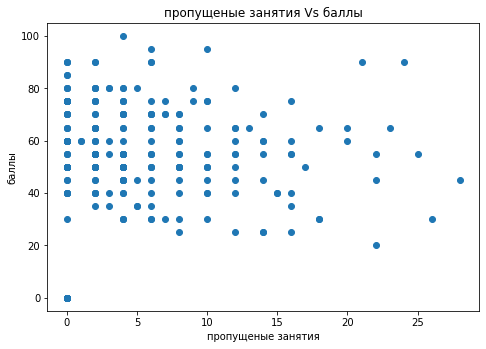

In [3]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = stud_math['absences'], y = stud_math['score'], marker = 'o')
axes.set_title('пропущеные занятия Vs баллы')
axes.set_xlabel('пропущеные занятия')
axes.set_ylabel('баллы')

In [4]:
display(stud_math.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0,0,18,0,0,1,4.0,4.0,2,3,0,0,2.0,2.0,0.0,1,0,0,0,1,1,1,0,4.0,3.0,4.0,3.0,6.0,30.0
1,0,0,17,0,0,0,1.0,1.0,2,0,0,1,1.0,2.0,0.0,0,1,0,0,0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,0,0,15,0,1,0,1.0,1.0,2,0,3,0,1.0,2.0,3.0,1,0,0,0,1,1,1,0,4.0,3.0,2.0,3.0,10.0,50.0
3,0,0,15,0,0,0,4.0,2.0,4,0,1,0,1.0,3.0,0.0,0,1,1,1,1,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0
4,0,0,16,0,0,0,3.0,3.0,0,0,1,1,1.0,2.0,0.0,0,1,1,0,1,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0
5,0,1,16,0,1,0,4.0,3.0,1,0,2,0,1.0,2.0,0.0,0,1,1,1,1,1,1,0,5.0,4.0,2.0,5.0,10.0,75.0
6,0,1,16,0,1,0,2.0,2.0,0,0,1,0,1.0,2.0,0.0,0,0,0,0,1,1,1,0,4.0,4.0,4.0,3.0,0.0,55.0
7,0,0,17,0,0,1,4.0,4.0,0,3,1,0,2.0,2.0,0.0,1,1,0,0,1,1,0,0,4.0,1.0,4.0,1.0,6.0,30.0
9,0,1,15,0,0,0,3.0,4.0,0,0,1,0,1.0,2.0,0.0,0,1,1,1,1,1,1,0,5.0,5.0,1.0,5.0,0.0,75.0
10,0,0,15,0,0,0,4.0,4.0,3,4,2,0,1.0,2.0,0.0,0,1,1,0,1,1,1,0,3.0,3.0,3.0,2.0,0.0,45.0


In [5]:
stud_math.describe().T # поиск выбросов 

,count,mean,std,min,25%,50%,75%,max
school,279.0,0.132616,0.339769,0.0,0.0,0.0,0.0,1.0
sex,279.0,0.465950,0.499736,0.0,0.0,0.0,1.0,1.0
age,279.0,16.702509,1.272719,15.0,16.0,17.0,18.0,22.0
address,279.0,0.222222,0.416487,0.0,0.0,0.0,0.0,1.0
famsize,279.0,0.261649,0.440322,0.0,0.0,0.0,1.0,1.0
Pstatus,279.0,0.078853,0.269994,0.0,0.0,0.0,0.0,1.0
Medu,279.0,2.799283,1.090772,0.0,2.0,3.0,4.0,4.0
Fedu,279.0,2.544803,1.098053,0.0,2.0,2.0,4.0,4.0
Mjob,279.0,1.318996,1.349939,0.0,0.0,1.0,2.0,4.0
Fjob,279.0,0.670251,1.058815,0.0,0.0,0.0,1.0,4.0


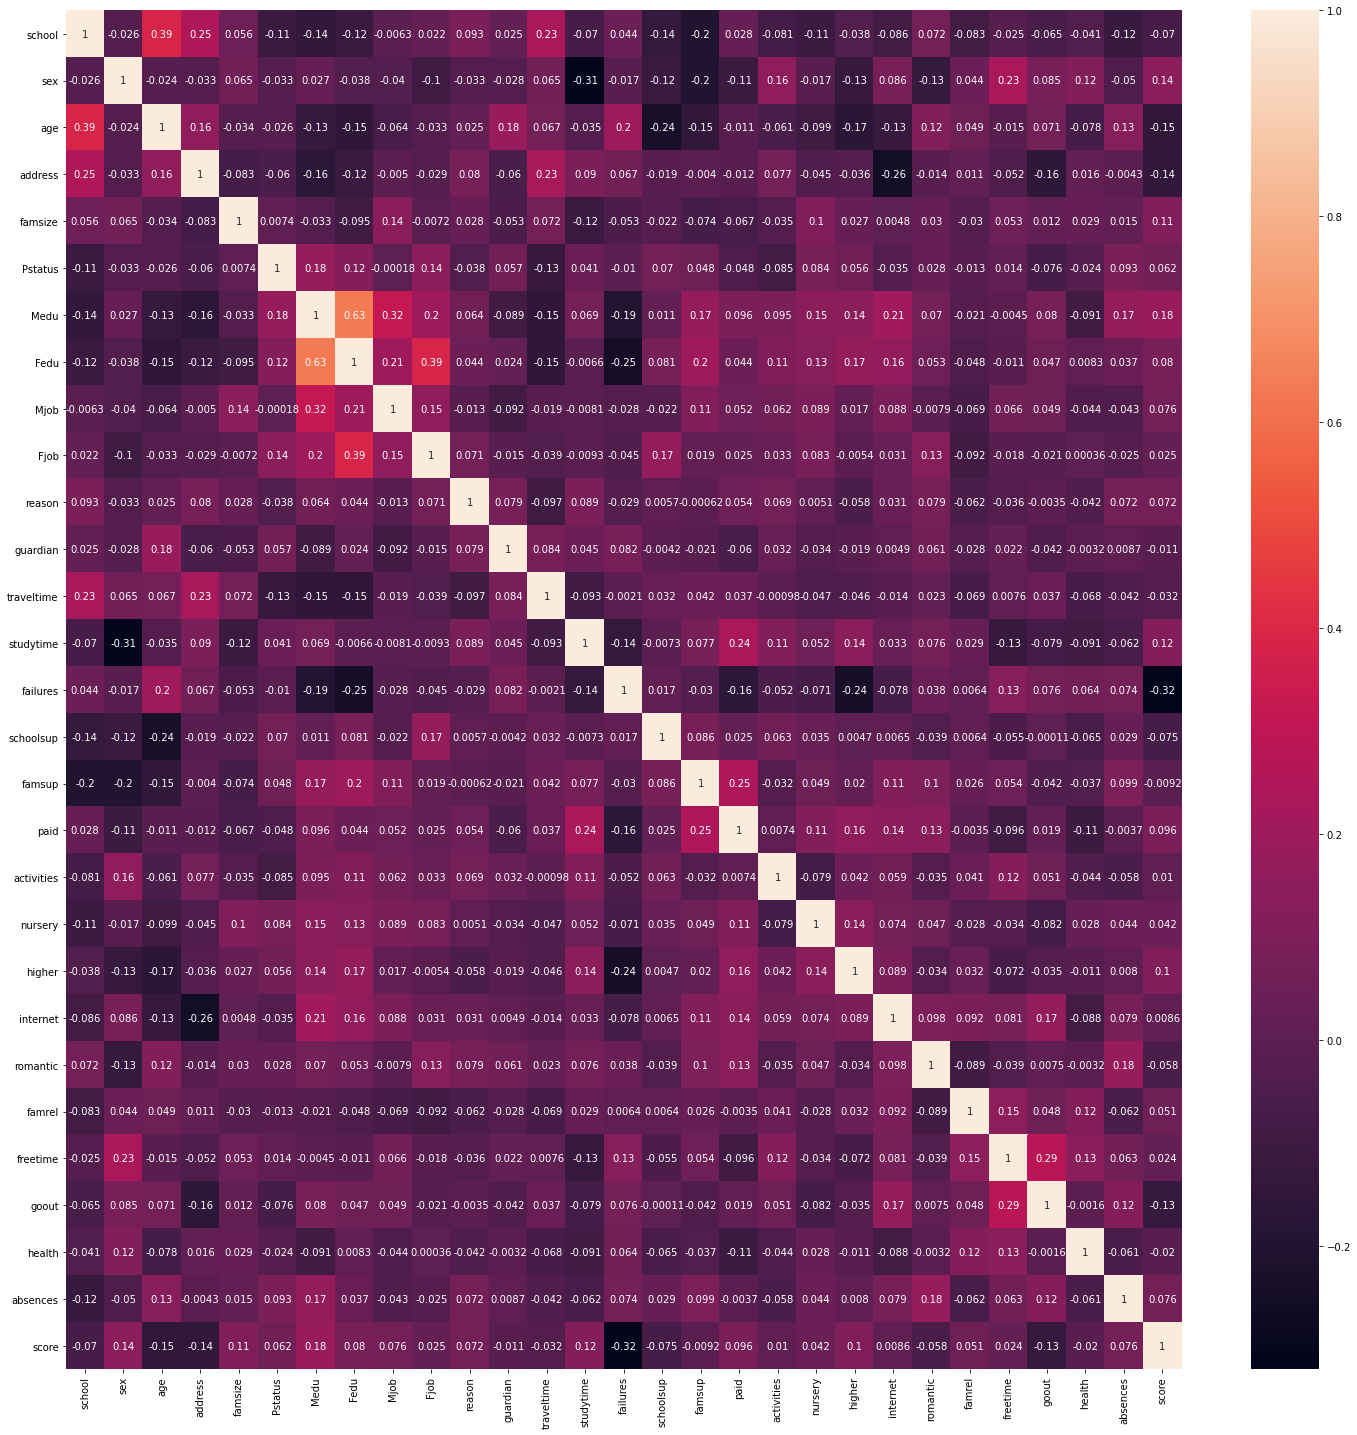

In [6]:
C = stud_math.corr(method='pearson')
plt.figure(figsize=(25,25)) # размер графика
sns.heatmap(data=C, annot=True)

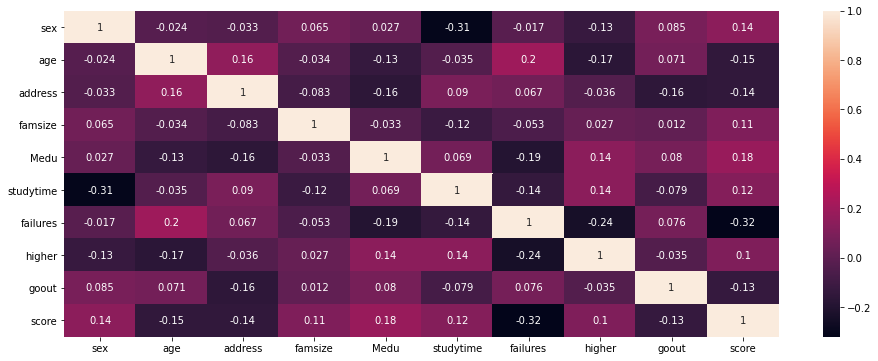

In [9]:
del stud_math['school'] #удаляем не коррелирующие переменные.
del stud_math['Pstatus']
del stud_math['Fedu']
del stud_math['Mjob']
del stud_math['Fjob']
del stud_math['reason']
del stud_math['guardian']
del stud_math['traveltime']
del stud_math['schoolsup']
del stud_math['famsup']
del stud_math['paid']
del stud_math['activities']
del stud_math['nursery']
del stud_math['internet']
del stud_math['romantic']
del stud_math['famrel']
del stud_math['freetime']
del stud_math['health']
del stud_math['absences']
C = stud_math.corr(method='pearson')
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C, annot=True)